In [1]:
import os, sys
import pandas as pd
import numpy as np
import numpy.matlib
import scipy as sp

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nispat.normative_model.norm_utils import norm_init

## Read in data

In [3]:
df_pheno = pd.read_csv('data/df_pheno.csv')
df_pheno.set_index(['bblid','scanid'], inplace = True)
df_pheno.head()

,,squeakycleanExclude,ageAtScan1,ageAtScan1_Years,sex,race2,handednessv2,dti64MeanAbsRMS,dti64MeanRelRMS,dti64MaxAbsRMS,dti64MaxRelRMS,mprage_antsCT_vol_TBV,averageManualRating,Overall_Psychopathology,Psychosis_Positive,Psychosis_NegativeDisorg,AnxiousMisery,Externalizing,Fear
bblid,scanid,,,,,,,,,,,,,,,,,,
81287,2738,0,240,20.0,2,1,1,0.351665,0.154478,0.557358,0.272518,1.497389e+06,2.0,0.314394,-1.109349,-0.572468,1.222410,1.134094,-0.235063
80680,2739,1,253,21.1,1,1,1,0.531246,0.208078,0.754717,0.354560,1.813450e+06,2.0,0.748088,-0.905436,1.414109,0.032372,2.343126,0.744692
81754,2740,1,232,19.3,2,1,1,0.310943,0.218462,0.460633,0.387235,1.364954e+06,2.0,1.381240,0.986549,-0.969899,0.301802,-0.313214,-0.344655
81903,2749,0,231,19.2,2,1,1,0.432610,0.283153,0.819576,0.509537,1.266520e+06,2.0,0.531327,-0.885234,0.085093,1.994165,-0.831330,-1.902806
81043,2750,0,249,20.8,2,2,1,0.162409,0.096761,0.429102,0.259678,1.254653e+06,2.0,-0.330777,-0.788469,-0.798989,-2.036093,-0.072305,-0.746145


In [4]:
df_system = pd.read_csv('data/df_system.csv')
df_system.set_index(['bblid','scanid'], inplace = True)
df_system.head()

,,ct,jd,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,...,jd_8,jd_9,jd_10,jd_11,jd_12,jd_13,jd_14,jd_15,jd_16,jd_17
bblid,scanid,,,,,,,,,,,,,,,,,,,,,
81287,2738,-0.244481,0.000682,-0.447502,-0.484110,-0.045826,-0.111647,-0.356220,-0.331039,-0.107237,-0.263501,...,-0.018313,0.059466,0.038632,-0.104141,-0.069048,-0.025119,0.033855,-0.005589,-0.012419,0.082375
80680,2739,-0.293535,-0.038376,-0.075566,-0.064355,-0.119455,-0.216842,-0.382597,-0.296695,-0.424994,-0.626117,...,-0.035643,-0.099134,-0.056971,-0.008471,-0.118097,-0.090080,-0.082227,-0.059138,0.031980,-0.055984
81754,2740,-0.115790,0.016437,0.155023,0.453592,-0.143237,-0.272653,-0.038651,-0.186689,-0.287686,-0.352952,...,-0.053909,-0.013814,-0.006453,0.057462,0.035556,-0.010350,-0.014886,-0.007110,-0.030681,-0.064011
81903,2749,-0.015776,-0.027930,-0.067138,-0.191562,0.118769,-0.160779,0.090528,0.025191,-0.088359,-0.248205,...,-0.047253,-0.054776,0.010141,-0.027603,-0.048177,0.058807,-0.034837,0.012315,0.026092,0.006368
81043,2750,0.045987,0.028378,-0.386811,-0.311837,-0.002629,0.262060,-0.096561,0.289440,0.041003,0.246226,...,-0.060398,-0.014248,0.004987,0.014552,0.067147,0.036815,-0.003796,0.030978,0.069522,0.109241


First, we'll pull out some training data

In [5]:
metric = 'jd'
X = df_pheno.loc[df_pheno['squeakycleanExclude'] == 0, 'ageAtScan1_Years'].values
Y = df_system.loc[df_pheno['squeakycleanExclude'] == 0, metric].values
if len(X.shape) == 1: X = X[:, np.newaxis]
if len(Y.shape) == 1: Y = Y[:, np.newaxis]

And do a quick linear plot of training data

/Users/lindenmp/.virtualenvs/generic/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


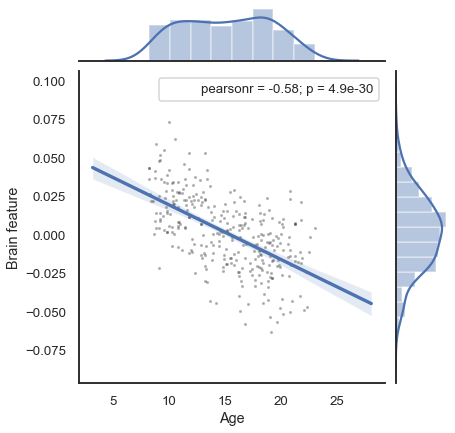

In [6]:
sns.set(style='white', context = 'talk', font_scale = 0.8)
f = sns.jointplot(x = X, y = Y, kind = 'reg')
f.ax_joint.set_xlabel('Age')
f.ax_joint.set_ylabel('Brain feature')
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

Standardize training data

In [7]:
mX = np.mean(X, axis=0)
sX = np.std(X,  axis=0)
Xz = (X - mX) / sX

mY = np.mean(Y, axis=0)
sY = np.std(Y, axis=0)
Yz = (Y - mY) / sY

Create evenly spaced X values for prediction

In [8]:
# Range of X
X_range = [np.min(X), np.max(X)]
Xsy = np.arange(X_range[0],X_range[1],1)
Xsy = Xsy.reshape(-1,1)
# Standardize using training data params
Xsyz = (Xsy - mX) / sX

Train gaussian process regression and generate predictions

In [9]:
nm = norm_init(Xz, Yz, alg='gpr', configparam=None)
Hyp = nm.estimate(Xz, Yz)
yhat, s2 = nm.predict(Xz, Yz, Xsyz, Hyp)
Yhat = yhat * sY + mY # get the predictions back in original (unstandardized) units
nlZ = nm.neg_log_lik
S2 = s2 * sY**2 # get predictive variance

Initialising GPR
Optimization terminated successfully.
         Current function value: 384.803975
         Iterations: 20
         Function evaluations: 48
         Gradient evaluations: 48


Plot predictions and predictive variance

Text(0.5, 0, 'Age')

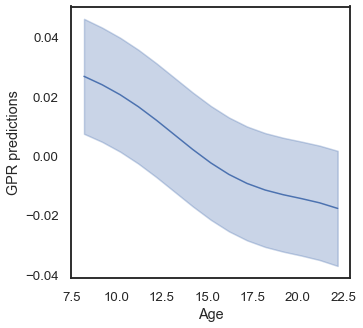

In [10]:
f, axes = plt.subplots(1,1)
f.set_figwidth(5)
f.set_figheight(5)

axes.plot(Xsy, Yhat, linestyle = 'solid', color = 'b', linewidth = 1.5)
upper_bound = Yhat.reshape(-1) + np.sqrt(S2); lower_bound = Yhat.reshape(-1) - np.sqrt(S2)
axes.fill_between(Xsy.reshape(-1), lower_bound, upper_bound, alpha = 0.3, color = 'b')
axes.set_ylabel('GPR predictions')
axes.set_xlabel('Age')

Get some test data

In [11]:
Xte = df_pheno.loc[df_pheno['squeakycleanExclude'] == 1, 'ageAtScan1_Years'].values
Yte = df_system.loc[df_pheno['squeakycleanExclude'] == 1, metric].values
testids = range(X.shape[0], X.shape[0]+Xte.shape[0])
if len(Xte.shape) == 1: Xte = Xte[:, np.newaxis]
if len(Yte.shape) == 1: Yte = Yte[:, np.newaxis]

Standardize using training params

In [12]:
Xtez = (Xte - mX) / sX
Ytez = (Yte - mY) / sY

Predict test data

In [13]:
yhat_test, s2_test = nm.predict(Xz, Yz, Xtez, Hyp)
Yhat_test = yhat_test * sY + mY # get the predictions back in original (unstandardized) units
S2_test = s2_test * sY**2 # get predictive variance

Calculate deviations

In [14]:
Z = (Yte.reshape(-1) - Yhat_test.reshape(-1)) / np.sqrt(S2_test)

Plot Z deviations against something of interest

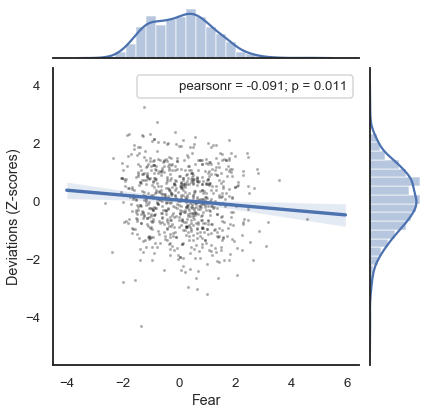

In [15]:
f = sns.jointplot(x = df_pheno.loc[df_pheno['squeakycleanExclude'] == 1, 'Fear'], y = Z, kind = 'reg')
f.ax_joint.set_ylabel('Deviations (Z-scores)')
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

Compare against original brain feature values

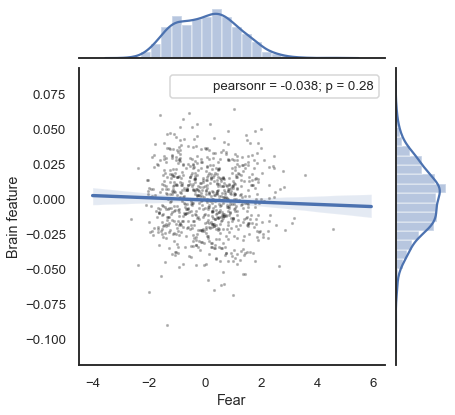

In [16]:
f = sns.jointplot(x = df_pheno.loc[df_pheno['squeakycleanExclude'] == 1, 'Fear'], y = Yte.reshape(-1), kind = 'reg')
f.ax_joint.set_ylabel('Brain feature')
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)